<a href="https://colab.research.google.com/github/AjayKumarGogineni777/Lung-Cancer-Classfication/blob/master/Pre_Trained1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#### Lung Cancer Classification using DenseNet161, ResNext, SeResNext, ResNet50 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import fastai
from google.colab import drive
drive.mount('/content/gdrive')
## Course v3
from fastai.vision import *
from fastai.metrics import error_rate

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#### Path of data
PATH = '/content/gdrive/My Drive/Cancer/CD output_2L/'


In [0]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=f1ec8677e44461142ecdc1d0cf478b2ea2bcb878cbf2a43a6145c1cc12c30706
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=b8caf42e1f1a01930a9f96822cdaf6b52513168a807e650c4a715d4cfd6eae2d
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pretrainedmodels munch


In [0]:
import pretrainedmodels

In [0]:
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


In [0]:
arch = pretrainedmodels.__dict__['senet154'](num_classes=1000,pretrained='imagenet')

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/senet154-c7b49a05.pth" to /root/.cache/torch/checkpoints/senet154-c7b49a05.pth
100%|██████████| 461488402/461488402 [21:39<00:00, 355228.38it/s]


In [0]:
## Custom Fastai itemlist for .mat files

import scipy.io as sio
import cv2

## Size of input image
siz = 50
class LabelList(ItemList):

    def get(self, i):
        fn = super().get(i)
#         print(fn)
        res = self.open(fn)
#         self.sizes[i] = res.size
        return res
    "Basic `ItemList` for dummy labels."
#     def get(self, i):
#         return EmptyLabel()
    def reconstruct(self, t:Tensor, x:Tensor=None):
        if len(t.size()) == 0: return EmptyLabel()
        return self.x.reconstruct(t,x) if has_arg(self.x.reconstruct, 'x') else self.x.reconstruct(t)
    def open(self, fn):
        "Open image in `fn`, subclass and overwrite for custom behavior."
        cls = Image
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning) # EXIF warning from TiffPlugin
            mat_contents = sio.loadmat(fn)
            k1 = mat_contents['ComMap']
            k2,k3 = cv2.split(k1)
            zer = np.zeros((siz,siz))
            ## for third channel zeros  x = np.stack([k2,k3,zer],axis=-1)
            x = np.stack([k2,k2,k2],axis=-1)
            #print(x.shape)
        x = pil2tensor(x,np.float32)
        #if div: x.div_(255)
        #return cls(x)
        
        
        return (x)


In [0]:
### path of the test folder
test_path = '/content/gdrive/My Drive/Cancer/CD output_2L/test'

## Create a databunch from the fastai label list
data = (LabelList.from_folder(PATH)
                     .split_by_folder()
                     .label_from_folder()
                     .databunch())

In [0]:
### Check the size of train and validation datasets and the number of classes
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['neg', 'pos'], 2, 5187, 1297)

In [0]:
### Databunch Object
data


DataBunch;

Train: LabelList (5187 items)
x: LabelList
tensor([[[0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
         [0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
         [0.2143, 0.2143, 0.9286,  ..., 0.9286, 0.9286, 0.9286],
         ...,
         [0.4286, 0.4286, 0.4286,  ..., 0.9286, 0.9286, 0.9286],
         [0.4286, 0.4286, 0.9286,  ..., 0.9286, 0.9286, 0.9286],
         [0.9286, 0.9286, 0.9286,  ..., 0.9286, 0.9286, 0.9286]],

        [[0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
         [0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
         [0.2143, 0.2143, 0.9286,  ..., 0.9286, 0.9286, 0.9286],
         ...,
         [0.4286, 0.4286, 0.4286,  ..., 0.9286, 0.9286, 0.9286],
         [0.4286, 0.4286, 0.9286,  ..., 0.9286, 0.9286, 0.9286],
         [0.9286, 0.9286, 0.9286,  ..., 0.9286, 0.9286, 0.9286]],

        [[0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
         [0.2143, 0.2143, 0.2143,  ..., 0.9286, 0.9286, 0.9286],
   

In [0]:

### Adding testing folders separately
pos_path = '/content/gdrive/My Drive/Cancer/data3/test/pos'
data.add_test(ItemList.from_folder(pos_path))

In [0]:
### Scaled 
neg_path = '/content/gdrive/My Drive/Cancer/scaled_image_50_50_2L/combined_pos_50'
data.add_test(ItemList.from_folder(neg_path))

In [0]:
test_path = '/content/gdrive/My Drive/Cancer/CD output_2L/test/pos'
data.add_test(ItemList.from_folder(test_path))
data.test_ds

In [0]:
test_data2 = (LabelList.from_folder(test_path)
                     .split_by_folder()
                     .label_from_folder()
                     .databunch())

In [0]:
test_data = '/content/gdrive/My Drive/Cancer/CD output_2L/test'
data.add_test(test_data)

In [0]:
data

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['neg', 'pos'], 2, 5187, 1297)

In [0]:
data.test_ds


In [0]:
#### Fine Tuning
!pip install cnn_finetune

     |████████████████████████████████| 61kB 9.0MB/s 
  Created wheel for cnn-finetune: filename=cnn_finetune-0.6.0-cp36-none-any.whl size=11432 sha256=f55a3995d8f7086e5e02169a31ffa3bec3a2a011bbf901705a8b0adf61a4c3bd
  Stored in directory: /root/.cache/pip/wheels/12/4f/29/32978e72b606c5f51b6bd10117814deb46c6b63230eef49381
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=f769d47cae327352348f1a93825f4074a38fce8eb3331f9f159cfd25db587f67
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=c75373d6facc32a6db1d58c7c2f2881d4c56d095d8a1b3d2c7c7c9a33c951046
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built cnn-finetune pretrainedmodels munch


In [0]:
from cnn_finetune import make_model

model = make_model('se_resnext50_32x4d', num_classes=2, pretrained=True, input_size=(50, 50))

In [0]:
#from fastai.vision.learner import create_head, cnn_config, num_features_model
#arch = models.resnet34
#cut = None
#meta = cnn_config(arch)
#body = create_body(arch(pretrained=True), ifnone(cut,meta['cut']))

##define number of classes of the "old" model
#nc = 2
#nf = num_features_model(body) * 2
#ps=0.5
#lin_ftrs = None

#head_124 = create_head(nf, nc, lin_ftrs, ps)

In [0]:
from fastai.vision.models.cadene_models import *

In [0]:
from fastai.vision.models import cadene_models

In [0]:
import torchvision.models as models
#resnet18 = models.resnet18(pretrained=True)
#alexnet = models.alexnet(pretrained=True)
#squeezenet = models.squeezenet1_0(pretrained=True)
#vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)
#inception = models.inception_v3(pretrained=True)
#googlenet = models.googlenet(pretrained=True)
#shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
#mobilenet = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:02<00:00, 50986197.40it/s]
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 100441675/100441675 [00:06<00:00, 14748840.63it/s]


In [0]:
learn = cnn_learner(data, models.resnext50_32x4d, metrics = accuracy)

In [0]:
def hinge(y_true, y_pred):
    zero = torch.Tensor([0]) 
    return torch.sum(torch.max(zero, 0.5 - y_true * y_pred) ** 2)

In [0]:
from fastai.vision import *
learn = cnn_learner(data, base_arch = cadene_models.se_resnext50_32x4d, metrics = accuracy)


In [0]:
#learn = cnn_learner(data, model, metrics = accuracy)

In [0]:
#### Seresnext

learn.fit_one_cycle(2)



epoch,train_loss,valid_loss,accuracy,time
0,0.548812,0.420190,0.848111,24:40
1,0.383795,0.379386,0.853508,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


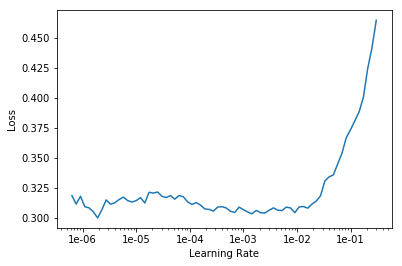

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.316576,0.337465,0.875867,00:21
1,0.242024,0.386181,0.879722,00:19
2,0.210254,0.347630,0.897456,00:19
3,0.155225,0.308265,0.904395,00:19
4,0.100611,0.306065,0.906708,00:19
5,0.057513,0.361757,0.912876,00:19
6,0.036341,0.429982,0.905166,00:19
7,0.023294,0.406546,0.904395,00:19
8,0.010453,0.402880,0.912876,00:19
9,0.006315,0.407022,0.912876,00:19


In [0]:
learn.fit_one_cycle(10, max_lr=slice(4e-4, 4e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.021177,0.491995,0.892830,00:19
1,0.175878,0.448221,0.858134,00:19
2,0.187571,0.317070,0.911334,00:19
3,0.166740,0.326878,0.893601,00:19
4,0.140935,0.248986,0.929067,00:19
5,0.098822,0.233221,0.925983,00:19
6,0.056673,0.305897,0.923670,00:19
7,0.034304,0.333820,0.925983,00:19
8,0.016565,0.335454,0.922128,00:19
9,0.008686,0.331352,0.923670,00:19


In [0]:
#stage-2-resnext50_32x4d.pth
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-1-resnext50_32x4d_new')

In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnext50_32x4d_new')

In [0]:
learn.load('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-senet154-1-channel')

In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnext50_32x4d')

In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-senet154-jpg')

In [0]:
learn.fit_one_cycle(10, max_lr=slice(2e-4,2e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.002585,0.395941,0.915960,00:21
1,0.048346,0.336619,0.905937,00:22
2,0.092747,0.331243,0.901311,00:21
3,0.095651,0.311497,0.904395,00:22
4,0.065956,0.350026,0.907479,00:22
5,0.037668,0.415003,0.915189,00:22
6,0.024445,0.370773,0.915189,00:22
7,0.013804,0.385999,0.922899,00:22
8,0.004539,0.382982,0.922128,00:22
9,0.002806,0.375815,0.922899,00:22


In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnext50_32x4d-ver-2')

In [0]:
#### Densenet results

In [0]:
#learn.crit = hinge
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.470176,0.355927,0.875867,23:34
1,0.292663,0.333419,0.877409,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


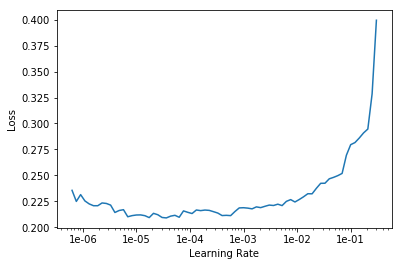

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.163106,0.332680,0.879722,00:22
1,0.146943,0.428609,0.844256,00:22
2,0.191804,0.310776,0.895143,00:22
3,0.141021,0.344731,0.884349,00:22
4,0.096154,0.346063,0.903624,00:21
5,0.057472,0.388240,0.900540,00:21
6,0.039563,0.399573,0.912105,00:21
7,0.027611,0.352894,0.898227,00:21
8,0.013139,0.372942,0.909021,00:21
9,0.006532,0.365169,0.909021,00:21


In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-4, 2e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.010002,0.400354,0.906708,00:21
1,0.103990,0.759434,0.908250,00:21
2,0.134845,0.270346,0.912876,00:21
3,0.085894,0.321639,0.906708,00:22
4,0.038241,0.391713,0.910563,00:21
5,0.019694,0.392868,0.914418,00:21
6,0.012241,0.388516,0.914418,00:21
7,0.007500,0.384067,0.920586,00:21


In [0]:
#stage-2-resnext50_32x4d.pth


In [0]:
learn.load('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-senet154-1-channel')

In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-1-senet154-jpg')

In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-senet154-jpg')

In [0]:
learn.fit_one_cycle(10, max_lr=slice(2e-4,2e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.002585,0.395941,0.915960,00:21
1,0.048346,0.336619,0.905937,00:22
2,0.092747,0.331243,0.901311,00:21
3,0.095651,0.311497,0.904395,00:22
4,0.065956,0.350026,0.907479,00:22
5,0.037668,0.415003,0.915189,00:22
6,0.024445,0.370773,0.915189,00:22
7,0.013804,0.385999,0.922899,00:22
8,0.004539,0.382982,0.922128,00:22
9,0.002806,0.375815,0.922899,00:22


In [0]:
learn.save('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnext50_32x4d-ver-2')

In [0]:
learn.load('/content/gdrive/My Drive/Cancer/CD output_2L/stage-2-resnext50_32x4d-ver-2')

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cancerous")

In [0]:
preds,y,losses = learn.get_preds(with_loss = True)

In [0]:
learn.load('/content/gdrive/My Drive/Cancer/data3/models/stage-2-senet.pth')

In [0]:
preds2,y,losses2 = learn.get_preds(ds_type=DatasetType.Test, with_loss = True)
preds = preds2

In [0]:
preds2,y,losses2 = learn.get_preds(ds_type=DatasetType.Test, with_loss = True)
preds = preds2

In [0]:
preds.shape

torch.Size([282, 2])

In [0]:
### for negative labels
import numpy as np
N = 575
neg = np.zeros(N)
for i in range(N):
  if preds[i][0]>0.3:
    neg[i] = 1

TN = np.sum(neg)  

In [0]:
TN

243.0

In [0]:
### for positive labels
import numpy as np
N = 101
pos = np.zeros(N)
for i in range(N):
  if preds[i][1]>0.5:
    pos[i] = 1

TP = np.sum(pos)  

In [0]:
TP

In [0]:
### for Scaled negative labels
import numpy as np
N = 1340
neg = np.zeros(N)
for i in range(N):
  if preds[i][0]>0.5:
    neg[i] = 1

TN = np.sum(neg)  
TN

In [0]:
TN

In [0]:
### for Scaled positive labels
import numpy as np
N = 282
pos = np.zeros(N)
for i in range(N):
  if preds[i][1]>0.35:
    pos[i] = 1

TP = np.sum(pos)  
TP

189.0

In [0]:
y

tensor([1, 1, 1,  ..., 0, 0, 0])

In [0]:
y.shape

torch.Size([1297])

In [0]:
### Test dataset
#preds,y,losses = learn.get_preds(with_loss = True)
preds = preds2
losses = losses2
import tensorflow as tf
sess = tf.Session()
with sess.as_default():
  tensor = tf.constant(preds)
  npa = tensor.eval()
  t2 = tf.constant(y)
  y_array = t2.eval()
ds = pd.DataFrame(npa)
ds.columns = data.classes  
ds.to_csv('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/se_resnext50_32x4d.csv')

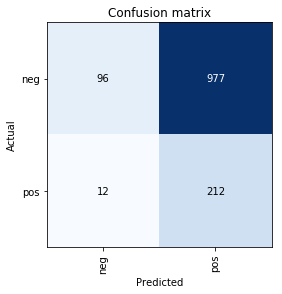

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#plt.savefig('/content/gdrive/My Drive/Cancer/CD output_2L/outputs/se_resnet50.jpg')